In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import copy
from sklearn.metrics import r2_score
import random
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.matlib 
from sklearn.model_selection import StratifiedKFold
from scipy.stats import hmean
import shap

In [2]:
numpy.random.seed(21)

In [3]:
data = pd.read_csv('.\\Data\\train.csv')
data_test = pd.read_csv('.\\Data\\test.csv')

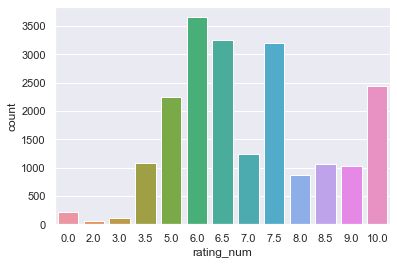

In [4]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="rating_num", data=data)

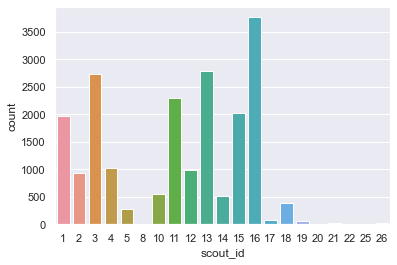

In [5]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="scout_id", data=data)

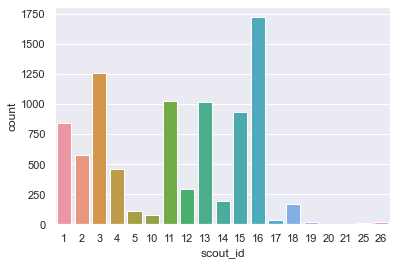

In [6]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="scout_id", data=data_test)

[ 8  5  4  7  9 10  6 11 14 15]


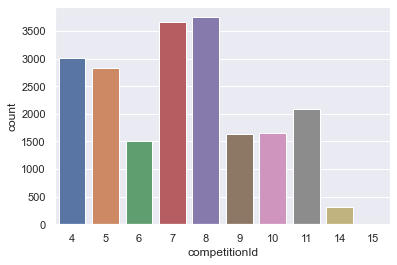

In [7]:
print(data.competitionId.unique())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="competitionId", data=data)

[ 8  5  4  7  9 10  6 11 14 15]


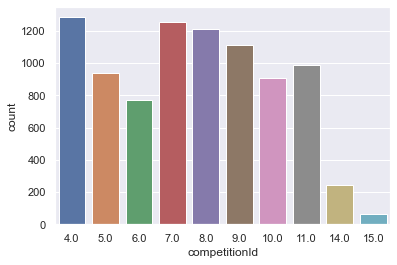

In [8]:
print(data.competitionId.unique())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="competitionId", data=data_test)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan, 20.0, 22.0, 23.0]


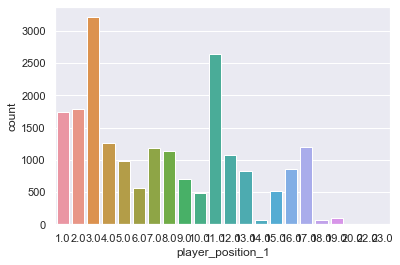

In [9]:
print(sorted(data.player_position_1.unique()))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="player_position_1", data=data)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan, 20.0, 22.0, 23.0]


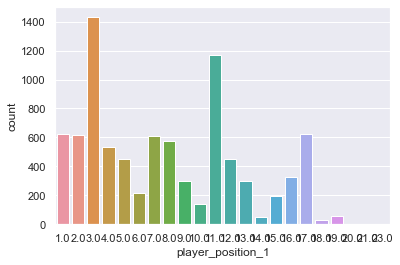

In [10]:
print(sorted(data.player_position_1.unique()))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="player_position_1", data=data_test)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan, 20.0, 22.0, 23.0]


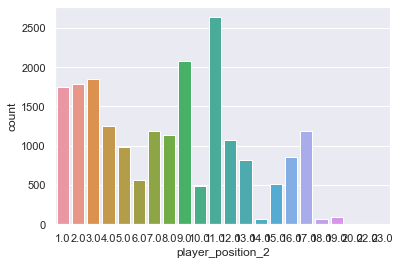

In [11]:
print(sorted(data.player_position_2.unique()))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="player_position_2", data=data)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan, 20.0, 22.0, 23.0]


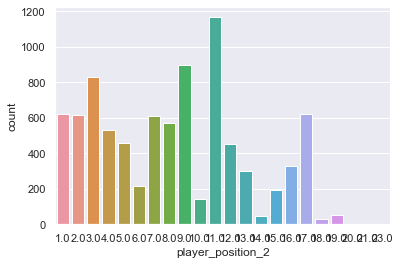

In [12]:
print(sorted(data.player_position_2.unique()))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="player_position_2", data=data_test)

<AxesSubplot:xlabel='player_height', ylabel='Count'>

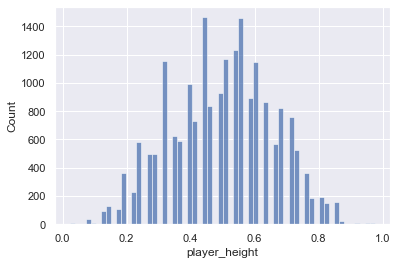

In [13]:
sns.histplot(data=data, x="player_height")

<AxesSubplot:xlabel='player_height', ylabel='Count'>

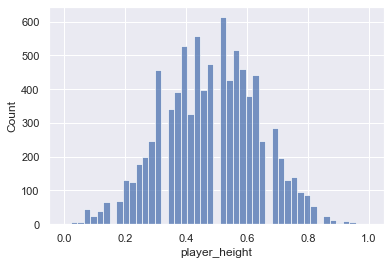

In [14]:
sns.histplot(data=data_test, x="player_height")

In [15]:
# observando as variaveis fornecidas
nn = list(data)
nn.remove('rating_num')
f = data[nn].nunique()
ff = data_test.nunique()
kk = 0
for x in nn:
    print(f[x],' ',x,' ', ff[kk], 'k :',kk-1)
    if ((f[x]) < 10) & ((f[x]) > 0):
       
        print( (data[x].unique()) )
        print ( (data_test[x].unique()) )
    kk = kk+1

20453   row_id   8774 k : -1
21   scout_id   19 k : 0
3   winner   3 k : 1
['winner' 'loser' 'draw']
['draw' 'loser' 'winner']
2   team   2 k : 2
['team1' 'team2']
['team1' 'team2' nan]
10   competitionId   10 k : 3
22   player_position_1   22 k : 4
22   player_position_2   22 k : 5
39   player_height   42 k : 6
46   player_weight   45 k : 7
6   player_general_var_0   6 k : 8
[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.2 0.4 0.6 0.8 1. ]
2   player_general_var_1   2 k : 9
[0 1]
[0 1]
101   player_general_var_2   101 k : 10
61   player_general_var_3   35 k : 11
93   player_general_var_4   96 k : 12
4   player_general_var_5   5 k : 13
[0.   0.25 0.5  0.75]
[0.   0.25 0.5  0.75 1.  ]
6   player_positional_raw_var_0   5 k : 14
[0.         0.16666667 0.33333333        nan 0.5        1.
 0.66666667]
[0.16666667 0.                nan 0.33333333 0.5        0.66666667]
5   player_positional_raw_var_1   3 k : 15
[0.   0.5  0.25  nan 0.75 1.  ]
[0.   0.25  nan 0.5 ]
5   player_positional_raw_var_2   5 k : 1

[0.  nan 0.5 1. ]
9   player_defensive_raw_var_100   8 k : 114
[0.    0.25  0.125   nan 0.375 0.625 0.5   0.75  0.875 1.   ]
[0.    0.125 0.375   nan 0.25  0.5   0.625 0.75  0.875]
11   player_other_raw_var_101   11 k : 115
11   player_offensive_raw_var_102   11 k : 116
91   player_other_raw_var_103   77 k : 117
92   player_other_raw_var_104   76 k : 118
61   player_offensive_raw_var_105   52 k : 119
21   player_other_raw_var_106   17 k : 120
26   player_other_raw_var_107   22 k : 121
67   player_other_raw_var_108   60 k : 122
42   player_other_raw_var_109   37 k : 123
37   player_positional_raw_var_110   29 k : 124
69   player_other_raw_var_111   61 k : 125
11   player_other_raw_var_112   9 k : 126
91   player_other_raw_var_113   91 k : 127
16   player_general_raw_var_114   15 k : 128
39   player_offensive_raw_var_115   34 k : 129
67   player_offensive_raw_var_116   59 k : 130
102   player_other_raw_var_117   92 k : 131
47   player_other_raw_var_118   38 k : 132
70   player_other_raw_

[  nan 0.    1.    0.5   0.667 0.333 0.2   0.25 ]
[  nan 0.    1.    0.5   0.333 0.25  0.667]
8   player_offensive_ratio_var_78   8 k : 291
[  nan 0.    1.    0.5   0.667 0.333 0.25  0.75  0.2  ]
[1.    0.      nan 0.5   0.4   0.667 0.25  0.333 0.75 ]
5   player_positional_ratio_var_79   4 k : 292
[  nan 0.    1.    0.5   0.75  0.333]
[  nan 1.    0.    0.5   0.667]
24   player_other_ratio_var_80   20 k : 293
10   player_defensive_ratio_var_81   9 k : 294
7   player_defensive_ratio_var_82   5 k : 295
[0.         0.16666667 0.33333333        nan 0.5        1.
 0.66666667 0.83333333]
[0.         0.16666667 0.33333333 0.5               nan 0.66666667]
5   player_defensive_ratio_var_83   6 k : 296
[0.  0.4 0.2 0.6 nan 0.8]
[0.  0.2 nan 0.4 0.8 0.6 1. ]
23   player_defensive_ratio_var_84   18 k : 297
11   player_defensive_ratio_var_85   9 k : 298
37   player_other_ratio_var_86   29 k : 299
6646   player_defensive_derived_var_0   3444 k : 300
12950   player_defensive_derived_var_1   6290 k :

120   team1_other_raw_var_42   112 k : 505
0   team1_other_raw_var_43   0 k : 506
1354   team1_other_raw_var_44   1140 k : 507
25   team1_other_raw_var_45   25 k : 508
478   team1_other_raw_var_46   429 k : 509
484   team1_other_raw_var_47   432 k : 510
164   team1_other_raw_var_48   155 k : 511
77   team1_other_raw_var_49   71 k : 512
0   team1_other_raw_var_50   0 k : 513
0   team1_other_raw_var_51   0 k : 514
23   team1_other_raw_var_52   23 k : 515
5   team1_other_raw_var_53   5 k : 516
[0.  0.2 nan 0.4 0.6 0.8]
[0.  0.2 0.4 nan 0.6 0.8]
131   team1_other_raw_var_54   120 k : 517
285   team1_other_raw_var_55   260 k : 518
329   team1_other_raw_var_56   304 k : 519
121   team1_other_raw_var_57   115 k : 520
73   team1_other_raw_var_58   69 k : 521
83   team1_other_raw_var_59   79 k : 522
509   team1_other_raw_var_60   462 k : 523
66   team1_other_raw_var_61   62 k : 524
10   team1_other_raw_var_62   10 k : 525
43   team1_other_raw_var_63   42 k : 526
48   team1_other_raw_var_64   45

67   team2_other_raw_var_75   60 k : 706
77   team2_other_raw_var_76   74 k : 707
907   team2_offensive_raw_var_77   821 k : 708
9   team2_other_raw_var_78   9 k : 709
[0.25  0.125 0.375 0.5     nan 0.625 0.75  0.    0.875 1.   ]
[0.25  0.375 0.125 0.    0.5   0.75  0.625   nan 0.875 1.   ]
3   team2_other_raw_var_79   3 k : 710
[0.5 0.  nan 1. ]
[0.  0.5 nan 1. ]
12   team2_other_raw_var_80   11 k : 711
10   team2_other_raw_var_81   10 k : 712
0   team2_other_raw_var_82   0 k : 713
1402   team2_other_raw_var_83   1203 k : 714
11   team2_other_raw_var_84   11 k : 715
16   team2_other_raw_var_85   15 k : 716
20   team2_offensive_raw_var_86   20 k : 717
11   team2_other_raw_var_87   11 k : 718
16   team2_other_raw_var_88   16 k : 719
10   team2_other_raw_var_89   10 k : 720
114   team2_other_raw_var_90   106 k : 721
367   team2_offensive_raw_var_91   343 k : 722
0   team2_other_raw_var_92   0 k : 723
274   team2_other_raw_var_93   259 k : 724
235   team2_other_ratio_var_0   211 k : 725
2

In [16]:
'''
data['dummy1'] = np.random.randn(len(data),1)/5
data['dummy2'] = np.random.randn(len(data),1)/5
data['dummy3'] =  np.random.randn(len(data),1)/5
data['dummy4'] = np.random.randn(len(data),1)/5
data['dummy5'] = np.random.randn(len(data),1)/5
data['dummy6'] = np.random.randn(len(data),1)/5
data['dummy7'] = np.random.randn(len(data),1)/5
data['dummy8'] = np.random.randn(len(data),1)/5
data['dummy9'] = np.random.randn(len(data),1)/5
data['dummy10'] = np.random.randn(len(data),1)/5
'''

"\ndata['dummy1'] = np.random.randn(len(data),1)/5\ndata['dummy2'] = np.random.randn(len(data),1)/5\ndata['dummy3'] =  np.random.randn(len(data),1)/5\ndata['dummy4'] = np.random.randn(len(data),1)/5\ndata['dummy5'] = np.random.randn(len(data),1)/5\ndata['dummy6'] = np.random.randn(len(data),1)/5\ndata['dummy7'] = np.random.randn(len(data),1)/5\ndata['dummy8'] = np.random.randn(len(data),1)/5\ndata['dummy9'] = np.random.randn(len(data),1)/5\ndata['dummy10'] = np.random.randn(len(data),1)/5\n"

In [17]:
nomes = list(data)

nomes.remove('rating_num')
nomes.remove('row_id')

# no values vars

nomes.remove('team1_other_raw_var_19')
nomes.remove('team1_other_raw_var_31')
nomes.remove('team1_other_raw_var_33')
nomes.remove('team1_other_raw_var_38')
nomes.remove('team1_other_raw_var_40')
nomes.remove('team1_other_raw_var_43')
nomes.remove('team1_other_raw_var_50')
nomes.remove('team1_other_raw_var_51')
nomes.remove('team1_other_raw_var_72')
nomes.remove('team1_other_raw_var_82')
nomes.remove('team1_other_raw_var_92')
nomes.remove('team1_other_ratio_var_32')
nomes.remove('team1_other_ratio_var_33')
nomes.remove('team2_other_raw_var_19')
nomes.remove('team2_other_raw_var_31')
nomes.remove('team2_other_raw_var_33')
nomes.remove('team2_other_raw_var_38')
nomes.remove('team2_other_raw_var_40')
nomes.remove('team2_other_raw_var_43')
nomes.remove('team2_other_raw_var_50')
nomes.remove('team2_other_raw_var_51')
nomes.remove('team2_other_raw_var_72')
nomes.remove('team2_other_raw_var_82')
nomes.remove('team2_other_raw_var_92')
nomes.remove('team2_other_ratio_var_32')
nomes.remove('team2_other_ratio_var_33')

dict = {"loser" : 0, "draw" : 1, "winner" : 2}
data=data.replace({"winner": dict})
data_test=data_test.replace({"winner": dict})

dict = {"team1" : 0, "team2" : 1}
data=data.replace({"team": dict})     
data_test=data_test.replace({"team": dict})

In [18]:
data_test.dtypes[:10]

row_id                    int64
scout_id                  int64
winner                    int64
team                    float64
competitionId           float64
player_position_1       float64
player_position_2       float64
player_height           float64
player_weight           float64
player_general_var_0    float64
dtype: object

In [19]:
train_data = data[nomes].values
#mean_train =  np.mean(data['rating_num'].values)
train_labels = data['rating_num'].values# - mean_train


In [20]:
'''
# one model - 5 models
x = [2000, 43.39242104023334, -3.238831335606254, 0.09224971994011458, 0.7, 7.269269100539924, 55, 20.27295875619994, 1.85, 133.75095114438426] 

params = {           
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'tweedie',#''tweedie
    'num_leaves': int(x[1]),      # 31
    'learning_rate': np.exp(x[2]),   #0.01,
    'feature_fraction': x[3],#0.9,
    'bagging_fraction': x[4],#0.8,
    'bagging_freq': 1,
    'max_depth': int(x[5]),        #-1,
    'min_data_in_leaf': int(x[6]), #20,
    'lambda_l2': x[7],        # 0,
    'is_unbalance' : False,
    'tweedie_variance_power': x[8],
    'max_bin' : int(x[9]),
    'metric': "mse",#,
    'verbose':-1
}
# folds prediction

num_k = 5
acc = 0

feature_importance = []
kf = KFold(n_splits=num_k,random_state=21,shuffle=True)

y_hat = 0

for train_index, test_index in kf.split(train_data):

    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=[0,1,2,3,4,5] )
    lgb_test = lgb.Dataset(X_test, y_test)

    gbm = lgb.train(params, lgb_train, num_boost_round=int(x[0]), categorical_feature=[0,1,2,3,4,5])     #x[0]
    y_pred = gbm.predict(X_test)

    v = r2_score(y_test, np.round(y_pred,2))
    print(v)   


    acc += v  
    
    feature_importance.append(gbm.feature_importance())
    
print(acc/5)

np.mean(np.array(feature_importance),axis=0)
df_ft = pd.DataFrame(np.mean(np.array(feature_importance),axis=0))
df_ft['nomes'] = nomes
df_ft.sort_values(by=0, ascending=False,inplace=True)

plt.figure(figsize=(20, 100))
sns.barplot(x=0, y="nomes", data=df_ft)
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
df_ft = df_ft.reset_index(drop=True)
print(df_ft.loc[df_ft['nomes'].str.contains('dummy')])
cut = df_ft.loc[df_ft['nomes'].str.contains('dummy')].mean() - df_ft.loc[df_ft['nomes'].str.contains('dummy')].std()*3
cut = -1
print(cut)
nomes2 = df_ft['nomes'].loc[ (df_ft[[0]] > cut).values ]
nomes2 = [x for x in nomes2 if 'dummy' not in x]
'''

'\n# one model - 5 models\nx = [2000, 43.39242104023334, -3.238831335606254, 0.09224971994011458, 0.7, 7.269269100539924, 55, 20.27295875619994, 1.85, 133.75095114438426] \n\nparams = {           \n    \'task\': \'train\',\n    \'boosting_type\': \'gbdt\',\n    \'objective\': \'tweedie\',#\'\'tweedie\n    \'num_leaves\': int(x[1]),      # 31\n    \'learning_rate\': np.exp(x[2]),   #0.01,\n    \'feature_fraction\': x[3],#0.9,\n    \'bagging_fraction\': x[4],#0.8,\n    \'bagging_freq\': 1,\n    \'max_depth\': int(x[5]),        #-1,\n    \'min_data_in_leaf\': int(x[6]), #20,\n    \'lambda_l2\': x[7],        # 0,\n    \'is_unbalance\' : False,\n    \'tweedie_variance_power\': x[8],\n    \'max_bin\' : int(x[9]),\n    \'metric\': "mse",#,\n    \'verbose\':-1\n}\n# folds prediction\n\nnum_k = 5\nacc = 0\n\nfeature_importance = []\nkf = KFold(n_splits=num_k,random_state=21,shuffle=True)\n\ny_hat = 0\n\nfor train_index, test_index in kf.split(train_data):\n\n    X_train, X_test = train_data[tra

In [21]:
# one model - 5 models
x = [20000, 43.39242104023334, -5.5, 0.09224971994011458, 0.7, 7.269269100539924, 55, 20.27295875619994, 1.85, 133.75095114438426]

params = {           
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'tweedie',#''tweedie
    'num_leaves': int(x[1]),      # 31
    'learning_rate': np.exp(x[2]),   #0.01,
    'feature_fraction': x[3],#0.9,
    'bagging_fraction': x[4],#0.8,
    'bagging_freq': 1,
    'max_depth': int(x[5]),        #-1,
    'min_data_in_leaf': int(x[6]), #20,
    'lambda_l2': x[7],        # 0,
    'is_unbalance' : False,
    'tweedie_variance_power': x[8],
    'max_bin' : int(x[9]),
    'metric': "mse",#,
    'seed':21,
    'verbose':-1
}

In [22]:
# training with new selected vars --- 
test_data = data_test[nomes].values
train_data = data[nomes].values
# folds prediction

num_k = 5
acc = 0
feature_importance = []
# treina a arvore
#kf = StratifiedKFold(n_splits=num_k,random_state=21,shuffle=True)

#for f in range(0,21):
#    print('f ',f)
#    acc = 0
    
kf = KFold(n_splits=num_k,random_state=21,shuffle=True)

y_hat = []
#n_iter = 1

for train_index, test_index in kf.split(train_data):
#n_iter = 1
#for train_index, test_index in kf.split(train_data, stratifie):

    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    #sample_weight_v = (y_train>7)*1+1

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=[0,1,2,3,4,5] )
    lgb_test = lgb.Dataset(X_test, y_test)

    gbm = lgb.train(params, lgb_train, num_boost_round=int(x[0]), categorical_feature=[0,1,2,3,4,5])     #x[0]
    # 
    y_pred = gbm.predict(X_test)

    v = r2_score(y_test, np.round(y_pred,2))
    print(v)   


    acc += v
    if (len(y_hat) == 0):
        y_hat = gbm.predict(test_data)    
    else:
        y_hat = np.c_[y_hat,gbm.predict(test_data)]
        
    feature_importance.append(gbm.feature_importance())
    
print(acc/5)

0.3521744918803337
0.3613851636621468
0.364132640891604
0.38270269004289237
0.3588400648098622
0.3638470102573678


In [23]:
###y_hat = y_hat/5


y_hat = hmean(y_hat,axis=1)
#y_hat = y_hat + mean_train # did not worked
y_hat = np.clip(y_hat,0, 10)
print(y_hat)

[6.26530406 4.74399878 5.61491646 ... 5.65468519 6.11421969 6.82653932]


In [24]:
#row_id	rating_num
commit = data_test[['row_id']]
commit[['rating_num']] = np.round(y_hat.reshape(-1,1),2)-0.21


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
commit.to_csv('submission_submission_final.csv',index=False)

<AxesSubplot:xlabel='rating_num', ylabel='Count'>

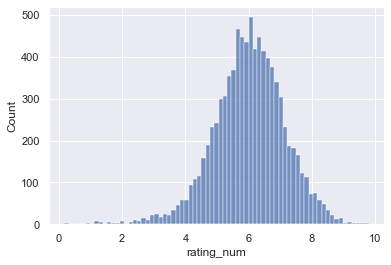

In [26]:
sns.histplot(data=commit, x="rating_num")

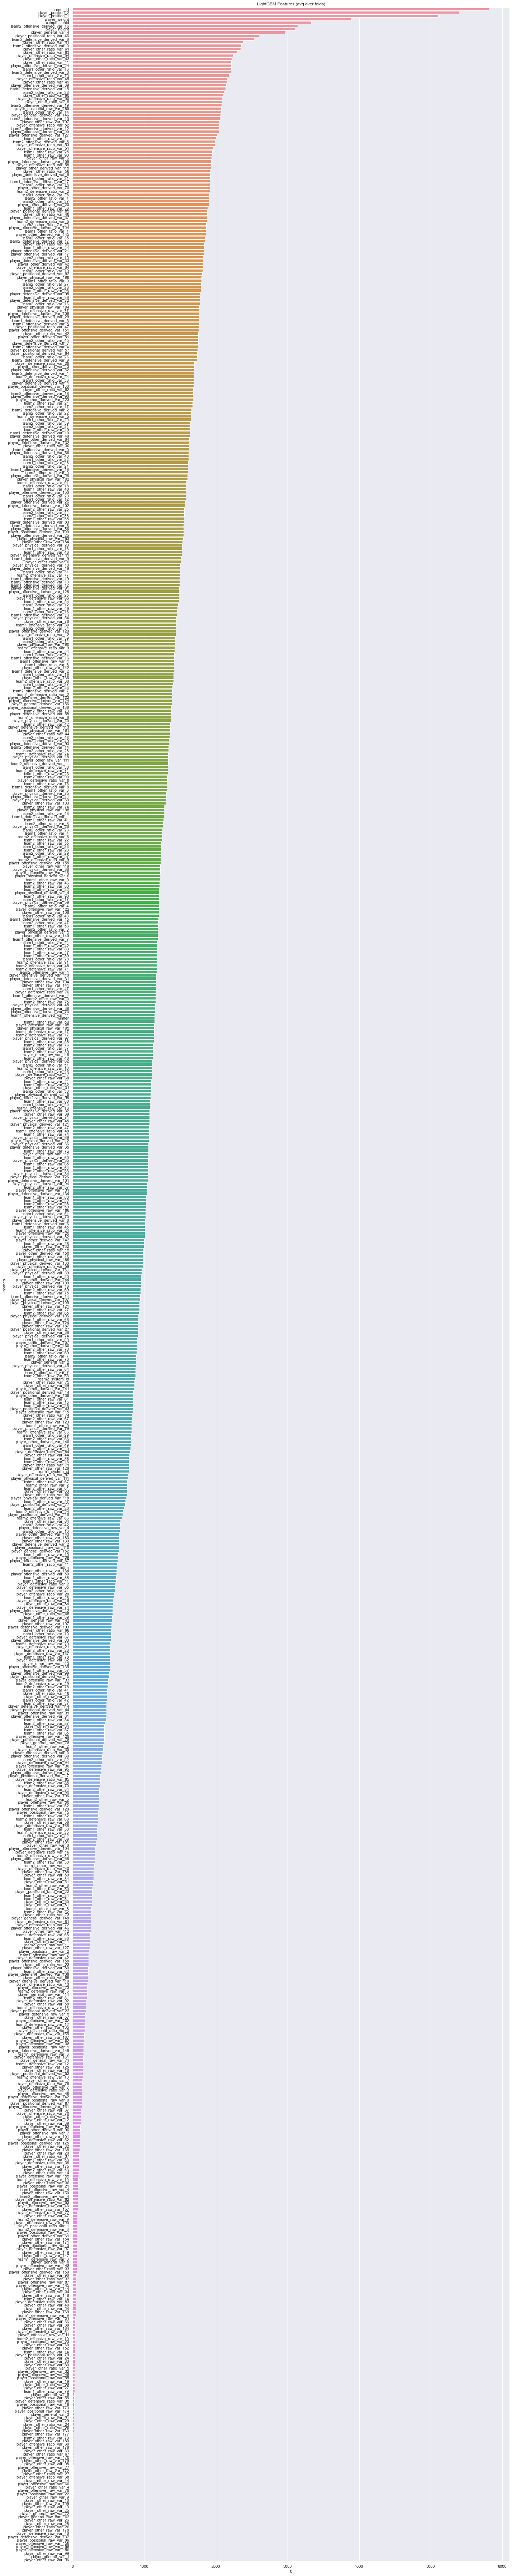

In [27]:
# feature importance
#np.mean(np.array(feature_importance),axis=0)
df_ft = pd.DataFrame(np.mean(np.array(feature_importance),axis=0))
df_ft['nomes'] = nomes
list(df_ft)
plt.figure(figsize=(20, 100))
sns.barplot(x=0, y="nomes", data=df_ft.sort_values(by=0, ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [28]:
len(df_ft)

772

In [29]:
%time shap_values = shap.TreeExplainer(gbm).shap_values(test_data[:1000,:] ) 

Wall time: 1min 9s


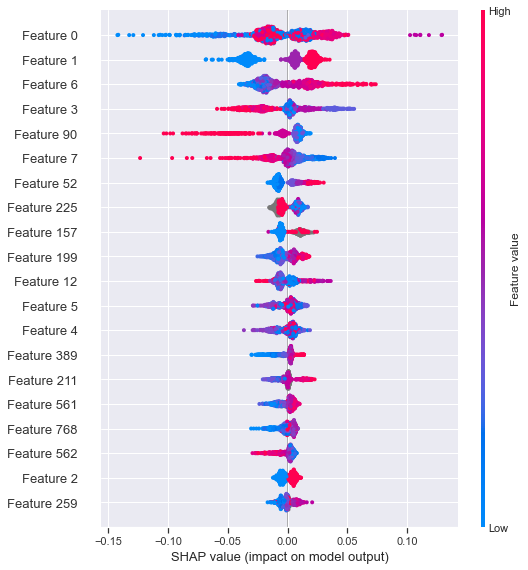

In [30]:
shap.summary_plot(shap_values, test_data[:1000,:])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


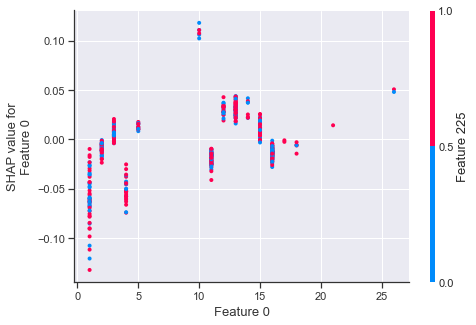

In [31]:
shap.dependence_plot(0, shap_values, test_data[:1000,:])